In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 38\Fuel_Veciles\data\external\fuel.csv')
df

C:\Users\Hamed\AppData\Local\Temp\ipykernel_7420\4181202693.py:1: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 38\Fuel_Veciles\data\external\fuel.csv')


,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,NaN,13.84,13.3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              36924 non-null  object 
 6   transmission                       38102 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  22693 non-null  object 
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

In [44]:
df.isnull().sum()

vehicle_id               0
year                     0
make                     0
model                    0
class                    0
                     ...  
city_range_ft1           0
highway_range_ft1        0
range_ft2            38113
city_range_ft2           0
highway_range_ft2        0
Length: 81, dtype: int64

In [45]:
columns = []
for col in df.columns:
    if(df[col].nunique() == 0):
        columns.append(col)
columns

['supercharger',
 'fuel_type_2',
 'start_stop_technology',
 'electric_motor',
 'manufacturer_code',
 'vehicle_charger',
 'alternate_charger',
 'range_ft2']

In [46]:
df.drop(columns=columns, inplace = True)

In [47]:
df.shape

(38113, 73)

In [48]:
df.isnull().sum()

vehicle_id           0
year                 0
make                 0
model                0
class                0
                    ..
range_ft1            0
city_range_ft1       0
highway_range_ft1    0
city_range_ft2       0
highway_range_ft2    0
Length: 73, dtype: int64

In [49]:
columns = []
for col in df.columns:
    if(df[col].isna().sum() > 0):
        columns.append(col)
columns

['drive',
 'transmission',
 'transmission_type',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'gas_guzzler_tax',
 'alternative_fuel_technology']

In [50]:
df_missing=df[columns]
(df_missing.isna().sum() / len(df)) * 100

drive                           3.119670
transmission                    0.028862
transmission_type              60.525280
engine_descriptor              40.458636
engine_cylinders                0.356834
engine_displacement             0.351586
turbocharger                   86.254034
gas_guzzler_tax                97.470679
alternative_fuel_technology    92.005353
dtype: float64

In [51]:
columns = []
for col in df_missing.columns:
    if(((df_missing[col].isna().sum() / len(df)) * 100 ) > 40):
        columns.append(col)
columns

['transmission_type',
 'engine_descriptor',
 'turbocharger',
 'gas_guzzler_tax',
 'alternative_fuel_technology']

In [52]:
df.drop(columns=columns, inplace = True)


In [53]:
df.shape

(38113, 68)

In [54]:
df

,vehicle_id,year,make,model,class,drive,transmission,engine_index,engine_cylinders,engine_displacement,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,9001,6.0,2.5,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,9005,6.0,2.5,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,9002,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,9006,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),90,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),52,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),53,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),54,4.0,2.0,...,3.0,0.0,29,32,30,0,0.0,0.0,13.84,13.3


In [55]:
np.array(df.isnull().sum())

array([   0,    0,    0,    0,    0, 1189,   11,    0,  136,  134,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int64)

In [56]:
df.dropna(axis=0 , inplace=True)
df

,vehicle_id,year,make,model,class,drive,transmission,engine_index,engine_cylinders,engine_displacement,...,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,city_range_ft2,highway_range_ft2
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,4.0,2.5,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,4.0,2.5,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
6,27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,6.0,4.2,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
7,28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,6.0,4.2,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
8,27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,6.0,4.2,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),90,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),52,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),53,4.0,2.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),54,4.0,2.0,...,3.0,0.0,29,32,30,0,0.0,0.0,13.84,13.3


C:\Users\Hamed\AppData\Local\Temp\ipykernel_7420\2197079783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


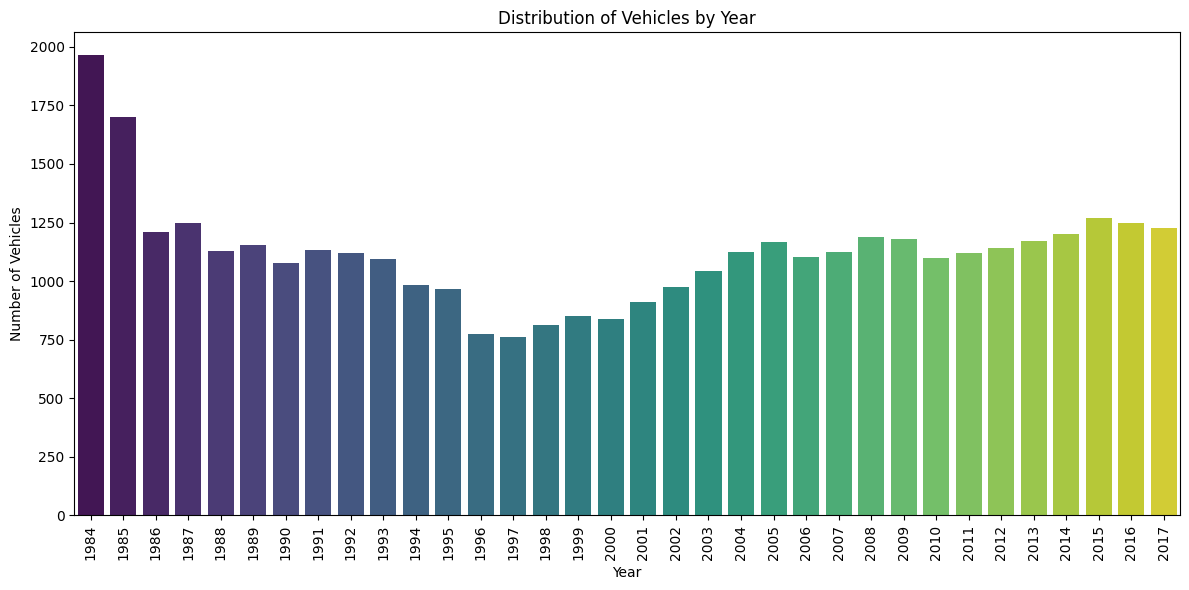

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of vehicles by year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

In [57]:
df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'engine_index', 'engine_cylinders', 'engine_displacement', 'fuel_type',
       'fuel_type_1', 'city_mpg_ft1', 'unrounded_city_mpg_ft1', 'city_mpg_ft2',
       'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd',
       'city_electricity_consumption', 'city_utility_factor',
       'highway_mpg_ft1', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2',
       'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd',
       'highway_electricity_consumption', 'highway_utility_factor',
       'unadjusted_city_mpg_ft1', 'unadjusted_highway_mpg_ft1',
       'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2',
       'combined_mpg_ft1', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2',
       'unrounded_combined_mpg_ft2', 'combined_electricity_consumption',
       'combined_gasoline_consumption_cd', 'combined_utility_factor',
       'annual_fuel_cost_ft1', 'annual_fuel_cost_ft2', 'save_or_spend_5_y

In [66]:
df_filtered = df.dropna(subset=['fuel_type', 'engine_cylinders'])

# Group data by 'Fuel_Type' and 'Cylinders' and calculate average CO2 emissions
avg_co2_by_fuel_and_cylinders = df_filtered.groupby(['fuel_type', 'engine_cylinders'])['tailpipe_co2_in_grams_mile_ft1'].mean().unstack()

<Figure size 1200x1000 with 0 Axes>

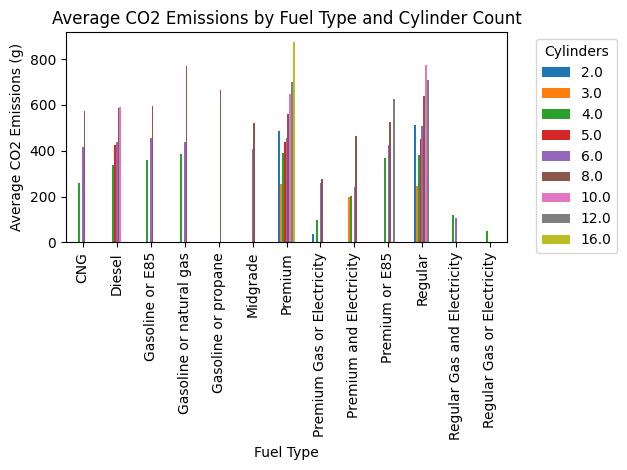

In [67]:
# Plotting the grouped bar chart
plt.figure(figsize=(12, 10))
avg_co2_by_fuel_and_cylinders.plot(kind='bar', stacked=False)
plt.title('Average tailpipe_co2_in_grams_mile_ft1 by Fuel Type and Cylinder Count')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g)')
plt.legend(title='Cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

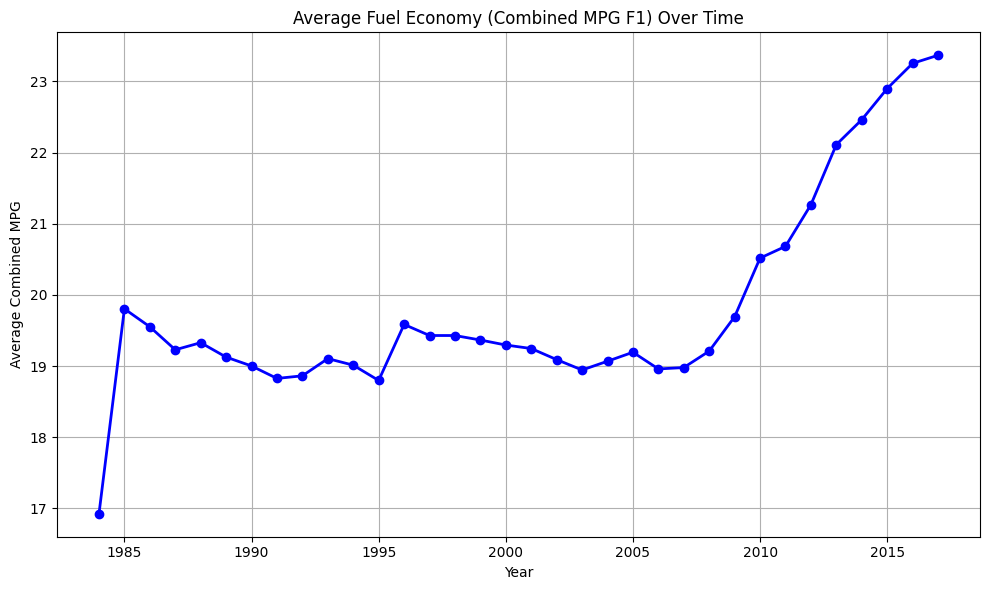

In [69]:
# Group data by year and calculate the average Combined_MPG
avg_mpg_by_year = df.groupby('year')['combined_mpg_ft1'].mean()

# Plot the trends for average fuel economy over time
plt.figure(figsize=(10, 6))
avg_mpg_by_year.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Average Fuel Economy (Combined MPG F1) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Hamed\AppData\Local\Temp\ipykernel_7420\1548476120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')


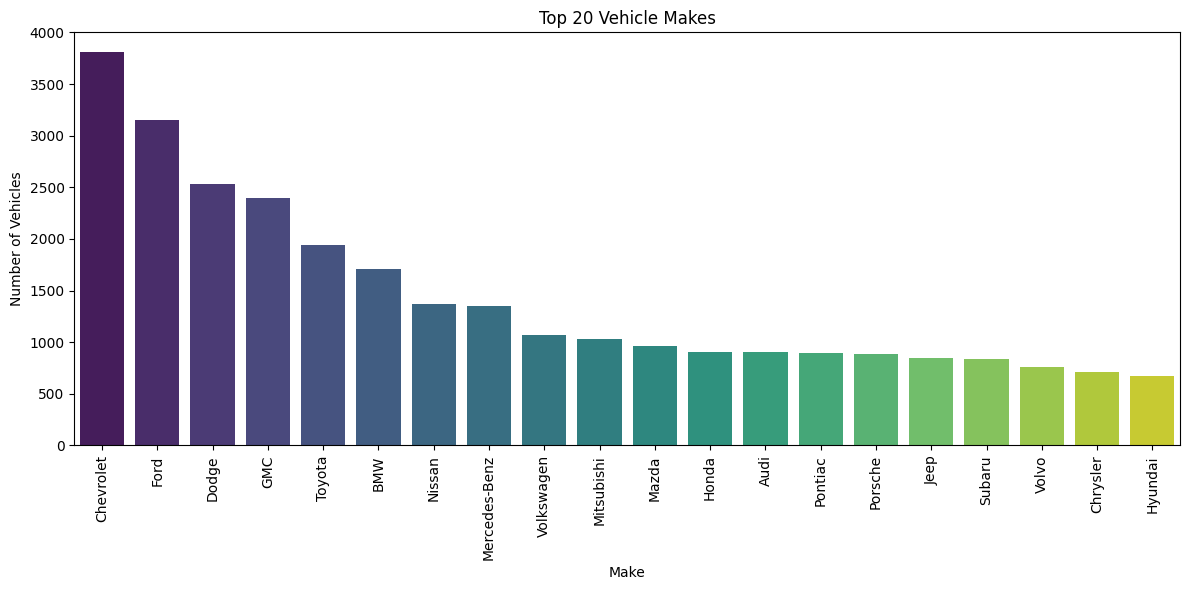

In [20]:
# Distribution of vehicles by make (top 20)

plt.figure(figsize=(12, 6))
top_makes = df['make'].value_counts().nlargest(20)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

C:\Users\Hamed\AppData\Local\Temp\ipykernel_7420\360026225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=df, palette='viridis')


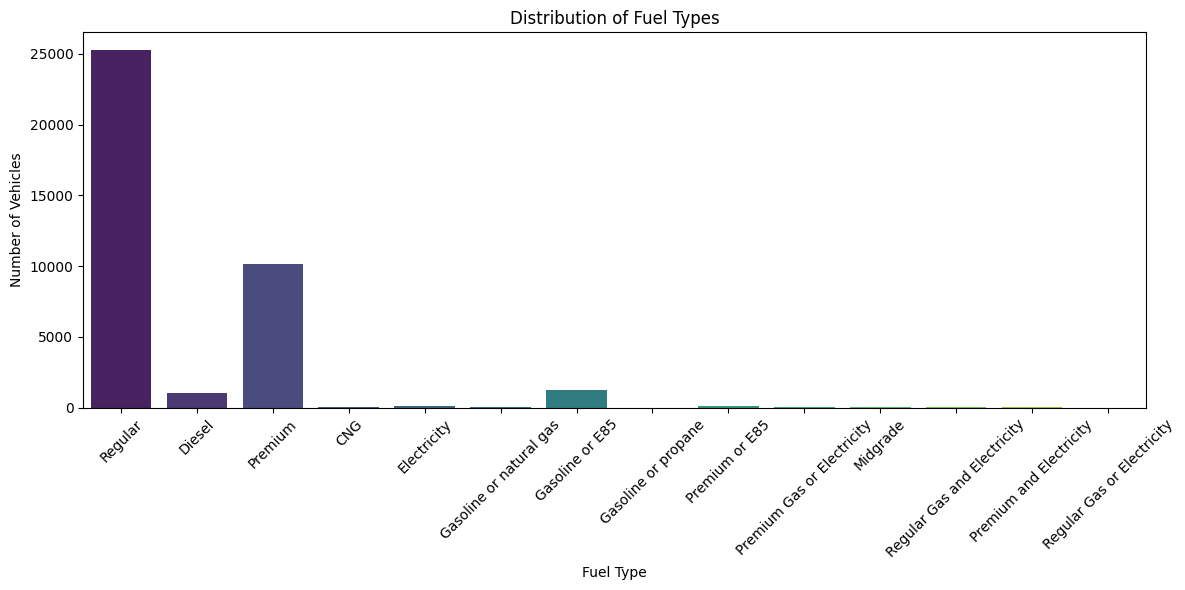

In [21]:
# Distribution of fuel types

plt.figure(figsize=(12, 6))
sns.countplot(x='fuel_type', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

C:\Users\Hamed\AppData\Local\Temp\ipykernel_7420\2261289770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, palette='viridis')


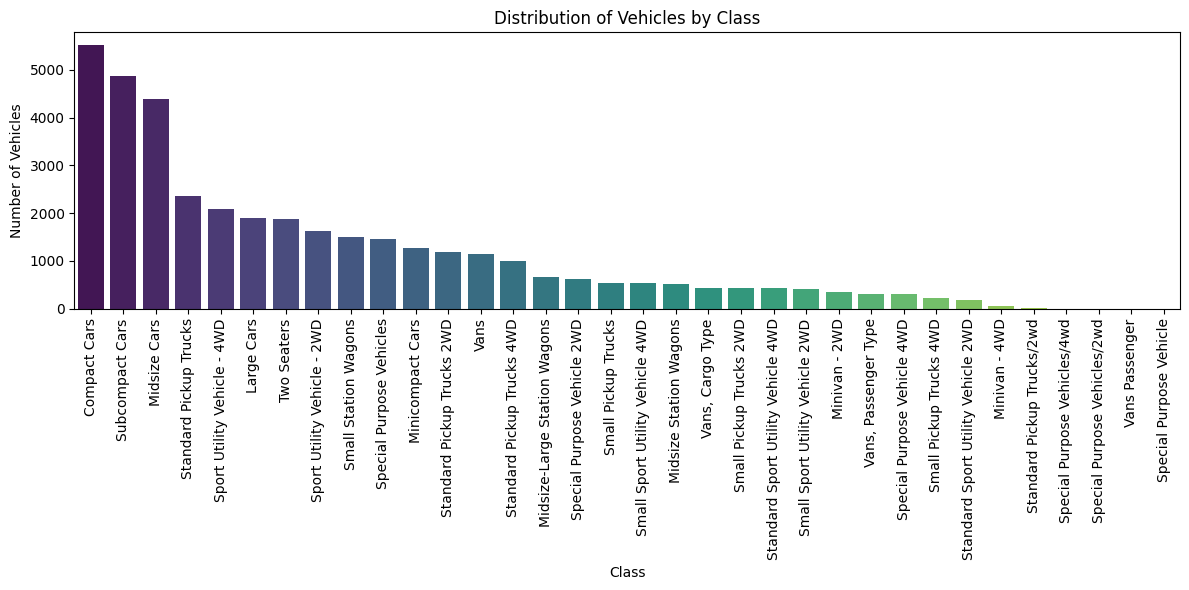

In [23]:
# Distribution of vehicles by class

plt.figure(figsize=(12, 6))
vehicle_classes = df['class'].value_counts()
sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Class')
plt.xlabel('Class')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

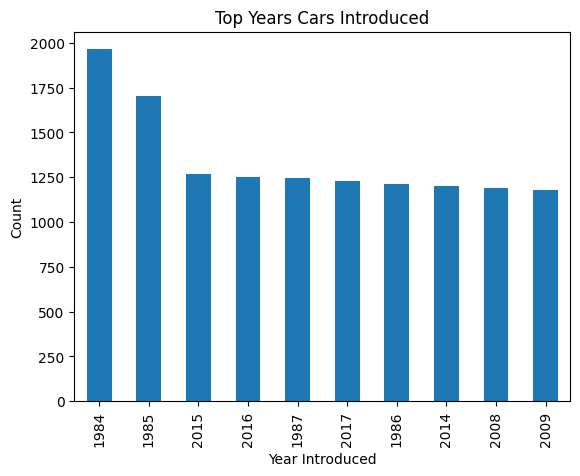

In [26]:
# Create a Bar Plot Based on # of Cars Introduced Per Year
ax = df['year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Years Cars Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Fuel Economy (MPG)')

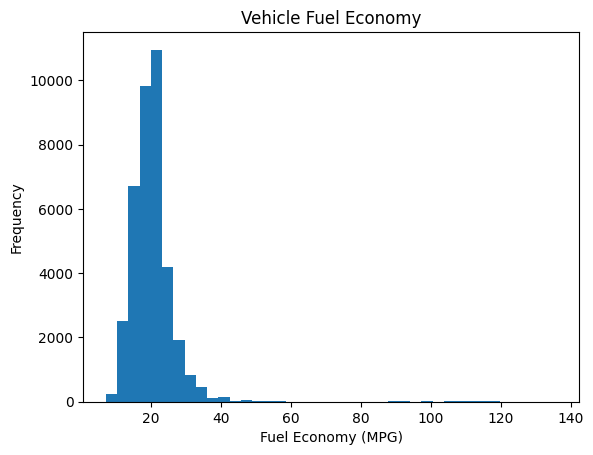

In [30]:
# Create Histogram Plot for determining the frequency of combined_ft1 fuel economy
ax = df['combined_mpg_ft1'].plot(kind='hist', bins=40, title='Vehicle Fuel Economy', )
ax.set_xlabel('Fuel Economy (MPG)')

Text(0.5, 0, 'Fuel Economy (MPG)')

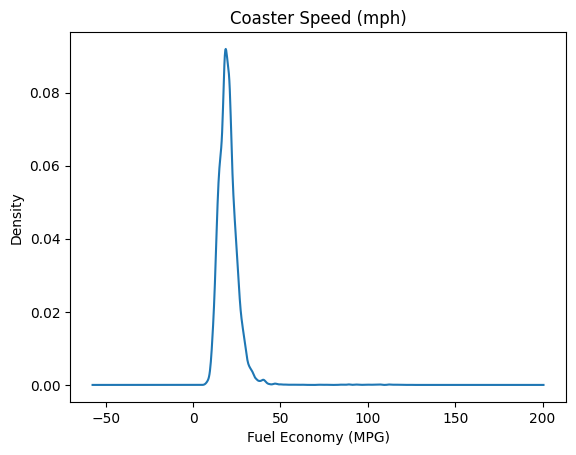

In [31]:
# Create KDE Plot for determining the frequency of combined_1 fuel economy
ax = df['combined_mpg_ft1'].plot(kind='kde', title='Coaster Speed (mph)')
ax.set_xlabel('Fuel Economy (MPG)')

In [33]:
df_corr = df[['year', 'combined_mpg_ft1','gasoline_electricity_blended_cd', 'tailpipe_co2_in_grams_mile_ft1', 'annual_fuel_cost_ft1']].dropna().corr()
df_corr

,year,combined_mpg_ft1,gasoline_electricity_blended_cd,tailpipe_co2_in_grams_mile_ft1,annual_fuel_cost_ft1
year,1.000000,0.179658,0.050470,-0.209285,-0.081016
combined_mpg_ft1,0.179658,1.000000,0.066704,-0.819916,-0.744850
gasoline_electricity_blended_cd,0.050470,0.066704,1.000000,-0.081120,-0.043945
tailpipe_co2_in_grams_mile_ft1,-0.209285,-0.819916,-0.081120,1.000000,0.935311
annual_fuel_cost_ft1,-0.081016,-0.744850,-0.043945,0.935311,1.000000


In [34]:
df.dtypes

vehicle_id             int64
year                   int64
make                  object
model                 object
class                 object
                      ...   
range_ft1              int64
city_range_ft1       float64
highway_range_ft1    float64
city_range_ft2       float64
highway_range_ft2    float64
Length: 64, dtype: object

<Axes: >

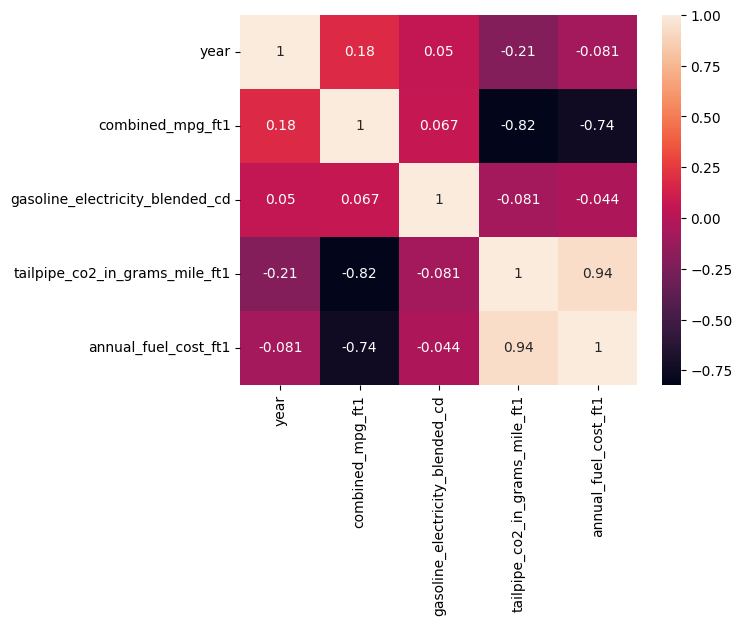

In [35]:
sns.heatmap(df_corr, annot=True)

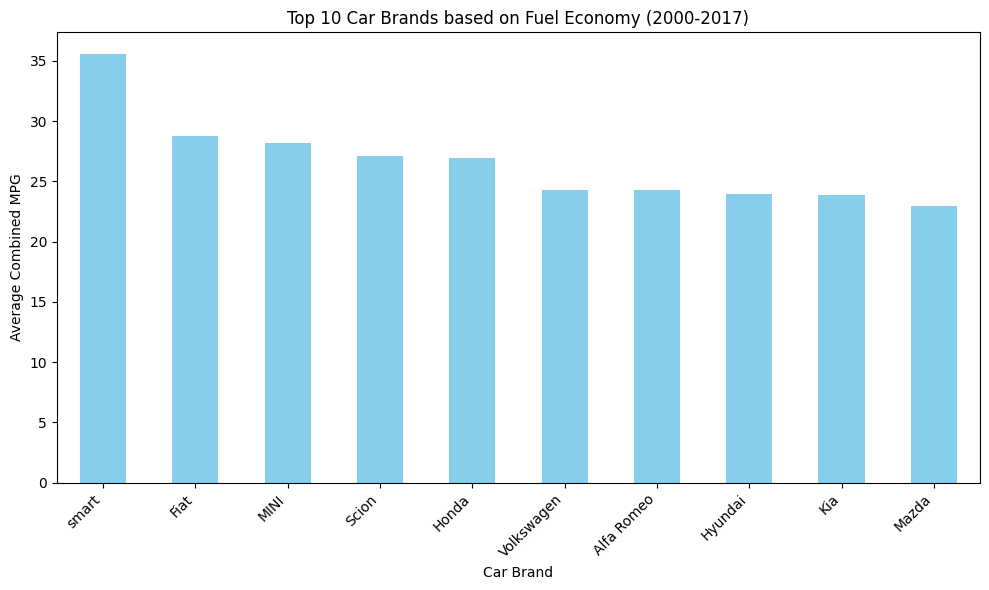

In [64]:
# Filter data for years 2007-2017
df_decade = df[df['year'].between(2000, 2017)]

# Calculate average fuel economy for each car brand
average_mpg_by_brand = df_decade.groupby('make')['combined_mpg_ft1'].mean()

# Sort the car brands based on average fuel economy and select top 10
top_10_brands = average_mpg_by_brand.sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Brands based on Fuel Economy (2000-2017)')
plt.xlabel('Car Brand')
plt.ylabel('Average Combined MPG')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [70]:
df.to_csv('../data/processed/datset_feul_cleaned_and_visulization.csv')